# Trabajo Práctico 1 - Matrices de Insumo Producto


### Consigna 1 - Analizar que sucede con la solución del sistema $p=(I-A)^{-1}d=Ld$

Recordemos que la matriz L y $L^{-1}$ son unicas.

$\textbf{(I-A) inversible} \rightarrow$ Para cualquier vector p podremos encontrar una unica solución (Sistema Compatible Determinado) y de hecho se puede calcular haciendo $L^{-1}p=d$

$\textbf{(I-A) inversible y d=0} \rightarrow p=L.0 \rightarrow p=0$. Este sistema homogeneo tiene como solucion el vector cero y esa es la unica solucion. 

$\textbf{(I-A) no inversible} \rightarrow$ Las soluciones del sistema pueden ser multiples o puede no tener solucion.

$\textbf{(I-A) no inversible y b=0} \rightarrow p=L.0 \rightarrow p=0$ El sistema tiene unica solucion y esa solucion es el vector cero

### Realizamos todos los import necesarios que utilizaremos más adelante

In [5]:
import funciones as f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as sc

### Consigna 2-

Para calcular la inversa de la matriz I-A utilizamos la descomposicion LU que se realiza en la funcion calcularLU mediante el metodo de eliminacion gausseana y obteniendo ademas de la descomposicion, la matriz P de permutacion.
Luego en inversaLU resolvemos dos sistemas:
* $Ly = e_i$ con $e_i$ el vector canonico con i menor a n
* $Ux =  y$

Almacenamos el vector en la variable de salida $Inv$. 

---

### Consigna 3 -  Resolver el sistema 2 utilizando inversaLU para los siguientes valores de A y d:

$$
A = \begin{pmatrix}
0.3 & 0.0 & 0.1 \\
0.05 & 1.0 & 0.2 \\
0.1 & 0.15 & 0.1
\end{pmatrix},\quad
d = \begin{pmatrix}
100\\
100\\
300
\end{pmatrix}
$$
Respondiendo lo siguiente:

$ \blacksquare $ ¿Hay una justificación económica de los valores encontrados para $p$?

$ \blacksquare $ ¿Cuál es la característica de la matriz que lleva a esta solución?

---

In [10]:
A = np.array(([0.3,0.0,0.1],[0.05,1.0,0.2],[0.1,0.15,0.1]))
d = np.array(([100],[100],[300]))
Id = np.identity(3)
L, U, P = f.calcularLU(Id-A)
Leontief = f.inversaLU(L, U, P)
p = Leontief@d
print(p)

[[   68.96551724]
 [-5149.42528736]
 [ -517.24137931]]


El problema es que para crear una unidad de $ p_{2} $ se consume una unidad de $ p_{2} $ y 0.15 de $ p_{3} $, consumiendo más de lo que se produce, haciendo que sea inviable no solo satisfacer la demanda externa, sino que la demanda interna también. Esto repercute de manera que cuando calculamos con la matriz de Leontief la cantidad total que se tiene que producir para satisfacer todas las demandas, nos da números negativos, ya que al querer satisfacer la demanda externa se baja la producciòn $ p_{2} $ por su alto coste, haciendo que parar satisfacer la demanda $d$ se tenga que "producir" unidades negativas tanto en $ p_{2} $ como en $ p_{3} $, ya que al querer disminuir la producción en $ p_{2} $ también lo haces en $ p_{3} $.

$$
p = \begin{pmatrix}
68.96 \\
-5149.43 \\
-517.24
\end{pmatrix}, \quad
p' = \begin{pmatrix}
-2307.69 \\
-11487.18 \\
79.92
\end{pmatrix}
$$



Esto se ve de mejor manera si nos fijamos en los valores $ a_{12} $ y $ a_{32} $ de la matriz $ A $, ya que si intercambias los valores y calculamos de nuevo la cantidad que debemos producir para satisfacer la demanda $ (p') $, te da valores negativos en $ p_{1} $ y $ p_{2} $, ya que al querer disminuir la producción en $ p_{2} $, también lo haces en $ p_{1} $. En general, los valores de la segunda columna (coste de producción de una unidad de $ p_{2} $) son los responsables de que $ p_{12} $ y $ p_{13} $ sean negativos.

---

### Consigna 4 -  
Analizar analı́ticamente qué sucede con la producción total cuando a partir de una demanda externa $d$, la demanda externa para el producto 3 cambia en un $\triangle d$. La demanda externa se convierte en:

$$
d´= d + 
\begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}
$$

Obtener la expresión del vector $\triangle p$ correspondiente a este ejemplo.

---

$$
\triangle p =  p' - p
$$

$$
\triangle p = (I - A)^{-1} \cdot d' - (I - A)^{-1} \cdot d
$$

$$
\triangle p = (I - A)^{-1} \cdot (d' - d)
$$

$$
\triangle p = (I - A)^{-1} \cdot \left( d + \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix} - d \right)
$$

$$
\triangle p = L \cdot \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}
$$






Un cambio en la demanda externa del tercer factor significaría necesariamente un cambio en la cantidad necesaria de productos para satisfacer la demanda en general ($p$) ya que la matriz de Leontief es una matriz inversa, por lo tanto no puede tener una fila con solo valores igual a 0, por lo tanto la diferencia entre p´ y p es necesariamente diferente a el vector 0. El cambio en la producción de cada sector dependerá en los valores que tenga en cada celda, ya que si por algún motivo no se pudiera satisfacer la demanda interno o un producto se consume a si mismo cuando se produce (como en la consigna anterior) podrían aparecer valores negativos, neutros o positivos, así que no se puede predecir más que cambiara $p$.

---

### Consigna 5 -

- Con los datos dados, sabemos la matriz Z y el vector P

In [18]:
p = np.array(([1000.0,0.0,0.0],[0.0,500.0,0.0],[0.0,0.0,1000.0]))
z = np.array(([350.0,0.0,0.0],[50.0,250.0,150.0],[200.0,150.0,550.0]))
L, U, P = f.calcularLU(p)
Id = np.identity(3)
A = z@(f.inversaLU(L, U, P))
L, U, P = f.calcularLU(Id-A) 
Leontief = f.inversaLU(L, U, P)
print(A)
print(Leontief)

[[0.35 0.   0.  ]
 [0.05 0.5  0.15]
 [0.2  0.3  0.55]]
[[1.53846154 0.         0.        ]
 [0.44871795 2.5        0.83333333]
 [0.98290598 1.66666667 2.77777778]]


### Consigna 6 - 
Partimos del siguiente sistema que sabemos que es valido:

$$
    \left( 
    \begin{pmatrix}
    I_{n \times n} & 0_{n \times m} \\
    0_{m \times n} & I_{m \times m}
    \end{pmatrix} 
    -
    \begin{pmatrix}
    A^{rr} & A^{rs} \\
    A^{sr} & A^{ss}
    \end{pmatrix}
    \right)
    \begin{pmatrix}
    p^{r} \\
    p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    d^{r} \\
    d^{s}
    \end{pmatrix}
$$

\begin{equation} 
    \begin{pmatrix}
    I_{n \times n} - A^{rr} & - A^{rs} \\
    - A^{sr} & I_{m \times m} - A^{ss}
    \end{pmatrix} 
    \begin{pmatrix}
    p^{r} \\
    p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    d^{r} \\
    d^{s}
    \end{pmatrix}
\end{equation}

donde suponemos que $A^{rr} ∈ R^{n×n}, A^{ss} ∈ R^{m×m}, A^{sr} ∈ R^{m×n} y A^{rs} ∈ R^{n×m}$

Como podemos observar, la resta es realizable ya que se da entre matrices que comparten las mismas dimensiones. Verifiquemos que las dimensiones de los bloques, que se detallan a continuación, cumplen las condiciones para la multiplicación de matrices por bloques. Llamemos \( A \) a la primera matriz y \( B \) a la segunda matriz en la multiplicación.

\begin{equation} 
    \begin{pmatrix}
    nxn & nxm \\
    mxn & mxm
    \end{pmatrix} 
    \begin{pmatrix}
    nx1 \\
    mx1
    \end{pmatrix}
    =
    \begin{pmatrix}
    nx1 \\
    mx1
    \end{pmatrix}
\end{equation}

### Condiciones para multiplicacion por bloques 
1. La cantidad de **columnas** de los bloques de \( A \) debe ser igual a la cantidad de **filas** de los bloques de \( B \):
   Cantidad de columnas de A = n + m y cantidad de filas de B = n + m

2. Los bloques a multiplicar deben cumplir lo siguiente:
   
    - La cantidad de columnas de $A_{11}$ debe ser igual a la cantidad de filas de $B_{11}$:
    
         \# columnas de $A_{11}$ = n, \# filas de $B_{11}$ = n
   
    - La cantidad de columnas de $A_{12}$ debe ser igual a la cantidad de filas de $B_{12}$:
    
         \# columnas de $A_{12}$ = m, \# filas de $B_{21}$ = m       
   
    - La cantidad de columnas de $A_{21}$ debe ser igual a la cantidad de filas de $B_{11}$:
    
         \# columnas de $A_{21}$ = n, \# filas de $B_{11}$ = n       
   
    - La cantidad de columnas de $A_{22}$ debe ser igual a la cantidad de filas de $B_{21}$:
    
         \# columnas de $A_{22}$ = m, \# filas de $B_{21}$ = m       

Estas condiciones aseguran que la multiplicación por bloques es válida y realizable.

---

Veamos como varia la produccion($\triangle$ p) al efectuar una variacion en la demanda ($\triangle$ d)

$$
    \begin{pmatrix}
    I_{n \times n} - A^{rr} & - A^{rs} \\
    - A^{sr} & I_{m \times m} - A^{ss}
    \end{pmatrix} 
    \begin{pmatrix}
    p^{r} + \triangle p^{r} \\
    p^{s} + \triangle p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    d^{r} + \triangle d^{r}\\
    d^{s} + \triangle d^{s}
    \end{pmatrix}
$$   

Desarrollamos la ecuacion para obtener una expresion equivalente:

$$
    \begin{pmatrix}
    I_{n \times n} - A^{rr} & - A^{rs} \\
    - A^{sr} & I_{m \times m} - A^{ss}
    \end{pmatrix} 
    \begin{pmatrix}
    p^{r} \\
    p^{s}
    \end{pmatrix}
    +
    \begin{pmatrix}
    I_{n \times n} - A^{rr} & - A^{rs} \\
    - A^{sr} & I_{m \times m} - A^{ss}
    \end{pmatrix} 
    \begin{pmatrix}
    \triangle p^{r} \\
    \triangle p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    d^{r}\\
    d^{s}
    \end{pmatrix}
    +
    \begin{pmatrix}
    \triangle d^{r}\\
    \triangle d^{s}
    \end{pmatrix}
$$ 

Como sabemos que la ecuacion(1) es siempre valida, se la restamos a esta ultima expresion que conseguimos para poder simplificarla

$$
    \begin{pmatrix}
    I_{n \times n} - A^{rr} & - A^{rs} \\
    - A^{sr} & I_{m \times m} - A^{ss}
    \end{pmatrix} 
    \begin{pmatrix}
    \triangle p^{r} \\
    \triangle p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    \triangle d^{r}\\
    \triangle d^{s}
    \end{pmatrix}
$$ 

Recordando que en el enunciado nos dicen que tomemos $\triangle d^{s} = 0$, obtenemos entonces el siguiente sistema de ecuaciones 
$$
\left\{
\begin{array}{l}
(I - A^{rr}) \triangle p^{r} - A^{rs} \triangle p^{s} = \triangle d^{r} (1)\\
-A^{sr} p^{r} + (I - A^{ss}) \triangle p^{s} = 0 (2)
\end{array}
\right.
$$

De la ecuacion (2) despejamos $\triangle p^{s}$

$$
\triangle p^{s} = (I - A^{ss})^{-1}A^{sr} p^{r}
$$

Reemplazamos $\triangle p^{s}$ en la ecuacion (1) y despejamos $\triangle p^{r}$

$$
\begin{aligned}
(I - A^{(rr)}) \triangle p^{(r)} - A^{(rs)}(I - A^{(ss)})^{-1}A^{(sr)} \triangle p^{(r)} &= \triangle d^{(r)} \\
(I - A^{(rr)} - A^{(rs)}(I - A^{(ss)})^{-1} A^{(sr)}) \triangle p^{(r)} &= \triangle d^{(r)} \\
\triangle p^{(r)} &= (I - A^{(rr)} - A^{(rs)}(I - A^{(ss)})^{-1} A^{(sr)})^{-1} \triangle d^{(r)}
\end{aligned}
$$




---

### Consigna 7 -

- Generamos la matriz Insumo-Producto de Paraguay y Nicaragua recortando el DataFrame original por las filas que tienen en la columna "Country_iso3" el pais deseado, esto nos da las tablas de Paraguay y Nicaragua, luego buscamos en estas tablas solo las columnas que sean de los sectores de Nicaragua o Paraguay dependiendo si queremos la matriz regional interna (su relacion consigo misma) o la externa (su relacion con el otro pais).  
  Esto nos deja con las submatrices $A_{pp}$, $A_{pn}$, $A_{np}$, $A_{nn}$ y las concatenamos para obtener la matriz:
  $$ 
    A = \begin{pmatrix}
    A^{pp} & A^{pn} \\
    A^{np} & A^{nn}
    \end{pmatrix}
    $$
  

In [23]:
matriz = pd.read_excel("matriz.xlsx", sheet_name ="LAC_IOT_2011",)
Nic_col = []    
Pry_col = []
for i in range(1,41): #Crea la lista de columnas a filtrar
    Nic_col.append('NICs'+str(i))
    Pry_col.append('PRYs'+str(i))
    
Pry = matriz[matriz["Country_iso3"] == "PRY"] # Crea la tabla con filas de PRY
Nic = matriz[matriz["Country_iso3"] == "NIC"] # Crea la tabla con filas de NIC


# Crea matrices intra-regionales
Pry_int= Pry.loc[:,Pry_col] 
Nic_int = Nic.loc[:,Nic_col] 

#Crea matrices intre-regionales
Nic_ext = Nic.loc[:,Pry_col] 
Pry_ext = Pry.loc[:,Nic_col]

#Columna con los nombres de los sectores para despues mantener los indices
colnames = pd.DataFrame({'Sectores':Pry_col + Nic_col})
colnamesPry = pd.DataFrame({'Sectores':Pry_col})
colnamesNic = pd.DataFrame({'Sectores':Nic_col})
# Se cambian los indices a los nombres del sector
Pry_int.index = colnamesPry['Sectores']
Nic_int.index = colnamesNic['Sectores']
Nic_ext.index = colnamesNic['Sectores']
Pry_ext.index = colnamesPry['Sectores']

#Concateno las submatrices para crear mi A
A_Pry = pd.concat([Pry_int,Nic_ext])
A_Nic = pd.concat([Pry_ext,Nic_int])
A = pd.concat([A_Pry,A_Nic], axis=1)
A

,PRYs1,PRYs2,PRYs3,PRYs4,PRYs5,PRYs6,PRYs7,PRYs8,PRYs9,PRYs10,...,NICs31,NICs32,NICs33,NICs34,NICs35,NICs36,NICs37,NICs38,NICs39,NICs40
Sectores,,,,,,,,,,,,,,,,,,,,,
PRYs1,227.254284,0.000000,0.000000,0.000000,1101.674356,402.694816,29.580976,821.173639,164.389296,4.524589,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PRYs2,0.000000,0.101057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PRYs3,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PRYs4,0.000000,0.000000,0.000000,1.130093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PRYs5,0.000000,0.000000,0.000000,0.000000,42.572816,4.968356,0.000000,17.733686,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NICs36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.070910,0.070123,1.889266,92.118246,3.849817,2.329597,9.287091,4.889133,68.153398
NICs37,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.443584,0.153783,1.613792,1.169620,8.193666,53.911819,8.896415,7.251069,41.721430
NICs38,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.176243,0.695838,7.392841,18.109905,19.247584,5.599573,79.819134,32.555134,158.727271


- Calculamos los coeficientes tecnicos para cada bloque usando la formula
$A = ZP^{-1}
$
- Donde Z es la matriz regional interna al que le vamos a calcular sus coeficientes regionales, y P es la produccion total de su propia region si es intra-regional, o la produccion total del otro pais si es intre-regional.  
Z ya lo habiamos conseguido cuando buscamos la matriz Insumo-Producto y P es la diagonalización de la columna "Output" del pais pedido

In [25]:
#Convierto la matriz y sus submatrices a arrays de numpy para trabajar mas comodo
A = A.to_numpy()
Pry_int = Pry_int.to_numpy()
Pry_ext = Pry_ext.to_numpy()
Nic_int = Nic_int.to_numpy()
Nic_ext = Nic_ext.to_numpy()
#Creo los vectores de produccion total para luego usar como P en la formula A = ZP^(-1)
Pry_out = Pry["Output"].to_numpy()
Pry_out_copy = Pry_out.copy()
Pry_out_copy[Pry_out_copy == 0] = 1 #remplazo 0 por 1
Nic_out = Nic["Output"].to_numpy()
Nic_out_copy = Nic_out.copy()
Nic_out_copy[Nic_out_copy == 0] = 1 #remplazo 0 por 1


#### Coef intra-regionales PRY

In [27]:
z = Pry_int
p = Pry_out_copy
p = np.diag(p) #Diagonalizo el vector
l,u,per = f.calcularLU(p) #Lu de p
inv_p = f.inversaLU(l,u,per) #Inversa de p
res_intra_PRY = z@inv_p
print(res_intra_PRY)

[[3.03111181e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.65297882e-03]
 [0.00000000e+00 2.39950794e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.20195704e-06]
 [0.00000000e+00 0.00000000e+00 5.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.42792850e-02 4.74872998e-04 0.00000000e+00 ... 9.41070127e-02
  4.23972964e-02 3.18275674e-02]
 [3.16410612e-02 7.77584708e-03 0.00000000e+00 ... 6.23468765e-02
  2.99270035e-02 3.46416389e-02]
 [9.47756653e-02 2.75152660e-02 0.00000000e+00 ... 3.16076277e-02
  9.92766835e-02 6.49659162e-02]]


#### Coef intra-regionales NIC

In [29]:
z = Nic_int
p = Nic_out_copy
p = np.diag(p) #Diagonalizo el vector
l,u,per = f.calcularLU(p) #Lu de p
inv_p = f.inversaLU(l,u,per) #Inversa de p
res_intra_NIC = z@inv_p
print(res_intra_NIC)

[[0.0813732  0.00911848 0.         ... 0.         0.00014813 0.00817845]
 [0.         0.04472229 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.01569514 0.02213548 0.         ... 0.1287523  0.0261541  0.03433314]
 [0.0050976  0.012128   0.         ... 0.09391116 0.01164656 0.04966059]
 [0.04858912 0.05775995 0.         ... 0.05301057 0.01663786 0.05764335]]


#### Coef inter-regionales PRY

In [31]:
z = Pry_int
p = Nic_out_copy
p = np.diag(p) #Diagonalizo el vector
l,u,per = f.calcularLU(p) #Lu de p
inv_p = f.inversaLU(l,u,per) #Inversa de p
res_inter_PRY = z@inv_p
print(res_inter_PRY)

[[8.32246397e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.69711542e-02]
 [0.00000000e+00 6.78679516e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.62682313e-05]
 [0.00000000e+00 0.00000000e+00 1.00000000e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.41199573e-02 1.34313611e-04 0.00000000e+00 ... 3.07564535e-01
  5.66671316e-02 1.16087044e-01]
 [8.68762382e-02 2.19932931e-03 0.00000000e+00 ... 2.03764709e-01
  3.99996600e-02 1.26351015e-01]
 [2.60223677e-01 7.78244868e-03 0.00000000e+00 ... 1.03301391e-01
  1.32690652e-01 2.36954998e-01]]


#### Coef inter-regionales NIC

In [33]:
z = Nic_int
p = Pry_out_copy
p = np.diag(p) #Diagonalizo el vector
l,u,per = f.calcularLU(p) #Lu de p
inv_p = f.inversaLU(l,u,per) #Inversa de p
res_inter_NIC = z@inv_p
print(res_inter_NIC)

[[2.96368084e-02 3.22388762e-02 0.00000000e+00 ... 0.00000000e+00
  1.10826056e-04 2.24228343e-03]
 [0.00000000e+00 1.58118049e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.71630331e-03 7.82611631e-02 0.00000000e+00 ... 3.93949653e-02
  1.95680152e-02 9.41311057e-03]
 [1.85658931e-03 4.28792024e-02 0.00000000e+00 ... 2.87344518e-02
  8.71373641e-03 1.36154373e-02]
 [1.76965693e-02 2.04213397e-01 0.00000000e+00 ... 1.62199014e-02
  1.24481407e-02 1.58040686e-02]]


- Simulamos el shock  usando el modelo de Leontief para dos regiones

$$
    \left( 
    \begin{pmatrix}
    I_{n \times n} & 0_{n \times m} \\
    0_{m \times n} & I_{m \times m}
    \end{pmatrix} 
    -
    \begin{pmatrix}
    A^{pp} & A^{pn} \\
    A^{np} & A^{nn}
    \end{pmatrix}
    \right)
    \begin{pmatrix}
    p^{r} \\
    p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    d^{r} \\
    d^{s}
    \end{pmatrix}
$$  
Calculamos con el modelo un D, donde la matriz I la podemos generar de la misma dimension que A, A es la matriz que Insumo-Producto, y el vector P lo podemos crear concatenando los dos vectores de la columna "Output" de cada pais.  
Luego aplicamos los shocks a cada sector pedido para tener un D', y con esto conseguir $\triangle$D$^{(p)}$.  


In [35]:
D1 = (np.identity(Pry_int.shape[0]) - res_intra_PRY) @ Pry_out_copy #Calculo Demanda de Pry

D2 = D1.copy()
D2[4] = D2[4]*0.9
D2[5] = D2[5]*1.033
D2[6] = D2[6]*1.033
D2[7] = D2[7]*1.033
Delta_Demanda = D2 - D1 # Diferencia en la demanda
print(Delta_Demanda)


[   0.            0.            0.            0.         -250.05133717
   32.14253661    5.88608251   66.1319947     0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]


Teniendo $\triangle$D$^{(p)}$, podemos buscar $\triangle$P$^{(p)}$ con la ecuacion del modelo considerando las relaciones inter-regionales  
$$ 
\begin{aligned}
\triangle p^{(p)} &= (I - A^{(pp)} - A^{(pn)}(I - A^{(nn)})^{-1} A^{(np)})^{-1} \triangle d^{(p)} 
\end{aligned}
$$


In [37]:
#Calculo Delta_P con Delta_Demanda con la ecuacion de variacion de produccion considerando las relaciones inter-regionales
Id = np.identity(Pry_int.shape[0])
Id_p = Id - res_intra_PRY
Id_n = Id - res_intra_NIC
l,u,p = f.calcularLU(Id_n)
Id_n_inv = f.inversaLU(l,u,p)
res = Id_p - (res_inter_NIC @ Id_n_inv @ res_inter_PRY)
l,u,p = f.calcularLU(res)
res_inv = f.inversaLU(l,u,p)
Delta_Prod = res_inv @ Delta_Demanda
print(Delta_Prod)

[-5.69208611e+01 -4.06164456e-02  0.00000000e+00 -1.46240238e-01
 -2.53370052e+02  3.35597442e+01  6.64261654e+00  6.93825035e+01
 -2.77400691e-01  1.51561195e-04 -3.51471742e-01 -2.96549407e-01
 -8.19046058e-02 -1.60816954e+00 -1.87308445e+00 -4.03570493e+00
  1.02282104e+00 -3.97013137e-01 -4.56450933e-01 -1.20325408e+00
 -6.25205816e-01 -1.06133108e-01 -5.26406307e-02 -3.09736207e-01
 -2.50414571e-01  0.00000000e+00 -4.52130864e-02  0.00000000e+00
 -3.13013092e-02 -7.78391820e-03  0.00000000e+00 -3.73386335e-01
 -4.68105393e+00 -2.98735028e+00 -1.01251721e+00 -7.62045758e+00
 -4.35358509e+00 -5.52946486e+00 -1.05402815e+01 -3.57722989e+01]


#### Graficamos la Variacion

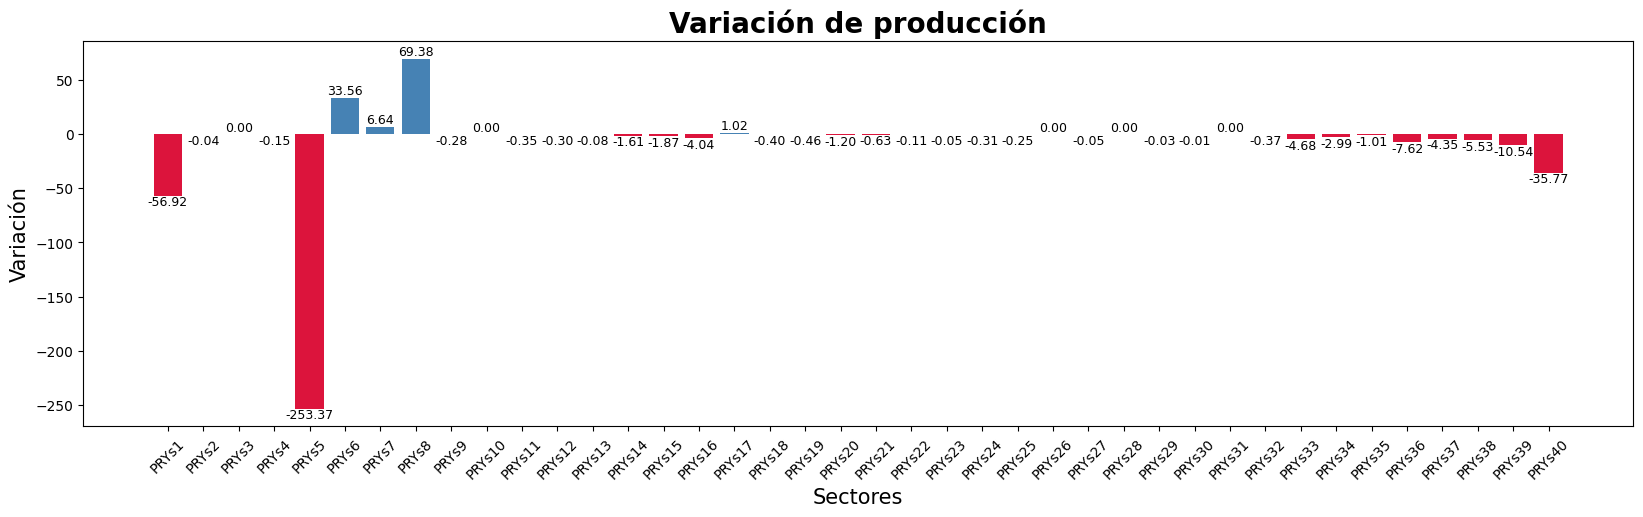

In [39]:
plt.figure(figsize=(20,5))

plt.bar(range(len(Delta_Prod)),Delta_Prod, 
color=np.where(Delta_Prod < 0, 'crimson', 'steelblue') #Color dependiendo de si es positivo o negativo
)

plt.xticks(range(len(Pry_col)),Pry_col,rotation=45)

plt.title('Variación de producción', fontsize=20, fontweight='bold')

# Agrego los valores encima de cada barra
for idx, value in enumerate(Delta_Prod):
    plt.text(idx, value + (0.01 if value >= 0 else -0.05), 
             f'{value:.2f}', ha='center', va='bottom' if value >= 0 else 'top', fontsize=9)

# Mejoro el estilo de los ejes
plt.xlabel('Sectores', fontsize=15)
plt.ylabel('Variación', fontsize=15)

plt.show()

Ahora queda calcular $\triangle$P$^{(p)}$ con la ecuación del modelo simple
$$
\begin{aligned}
\triangle p^{(p)} &= (I - A^{(pp)})^{-1} \triangle d^{(p)} 
\end{aligned}
$$

In [41]:
Id = np.identity(Pry_int.shape[0])
Id_p = Id - res_intra_PRY
l,u,p = f.calcularLU(Id_p)
Id_p_inv = f.inversaLU(l,u,p)
Delta_Prod_Simple = Id_p_inv @ Delta_Demanda
print(Delta_Prod_Simple)

[-6.82106241e+01 -2.66472764e-04  0.00000000e+00 -3.77748555e-02
 -2.53683571e+02  3.30969677e+01  6.55278975e+00  6.75942082e+01
 -7.65534727e-02 -8.85954139e-07 -4.06474186e-01 -2.66869238e-01
 -7.65496201e-02 -1.49302642e+00 -1.74793235e+00  0.00000000e+00
  4.05647629e-01 -5.13908459e-01 -5.65896240e-01 -9.55853798e-01
 -1.13697465e-01 -4.54360868e-02 -1.04392706e-02 -2.06060912e-01
 -5.48849882e-02  0.00000000e+00 -3.91354956e-02  0.00000000e+00
 -2.70937541e-02 -5.99208459e-03  0.00000000e+00 -2.38472488e-03
 -4.78822132e+00 -1.87080389e+00 -3.57467516e-01 -7.62322497e+00
 -3.22034723e+00 -4.98277253e+00 -5.65351323e+00 -3.69112672e+01]


#### Graficamos la Variacion

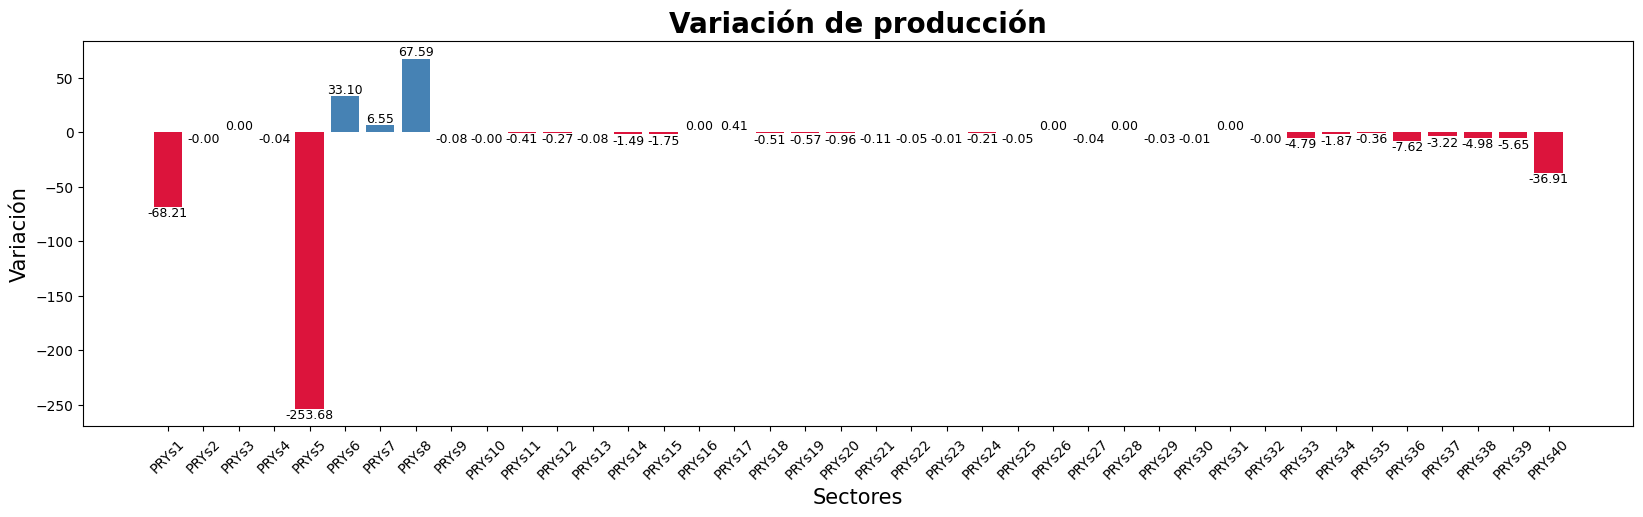

In [43]:
plt.figure(figsize=(20,5))

plt.bar(range(len(Delta_Prod_Simple)),Delta_Prod_Simple, 
color=np.where(Delta_Prod_Simple < 0, 'crimson', 'steelblue') #Color dependiendo de si es positivo o negativo
)

plt.xticks(range(len(Pry_col)),Pry_col,rotation=45)

plt.title('Variación de producción', fontsize=20, fontweight='bold')

# Agrego los valores encima de cada barra
for idx, value in enumerate(Delta_Prod_Simple):
    plt.text(idx, value + (0.01 if value >= 0 else -0.05), 
             f'{value:.2f}', ha='center', va='bottom' if value >= 0 else 'top', fontsize=9)

# Mejoro el estilo de los ejes
plt.xlabel('Sectores', fontsize=15)
plt.ylabel('Variación', fontsize=15)

plt.show()

Como se puede apreciar, la variación de resultados entre las dos ecuaciones es muy pequeña. Esto se debe a que $ A^{(pn)}$, $(I - A^{(nn)})^{-1}$ y $ A^{(np)}$ son matrices de valores muy pequeños, lo que significa que la matriz dada por $A^{(pn)}(I - A^{(nn)})^{-1} A^{(np)}$ tambien lo va a ser, entonces no se le va a restar mucho a $(I - A^{(pp)})$. Lo que hace que quede casi igual a la ecuacion del modelo simple.


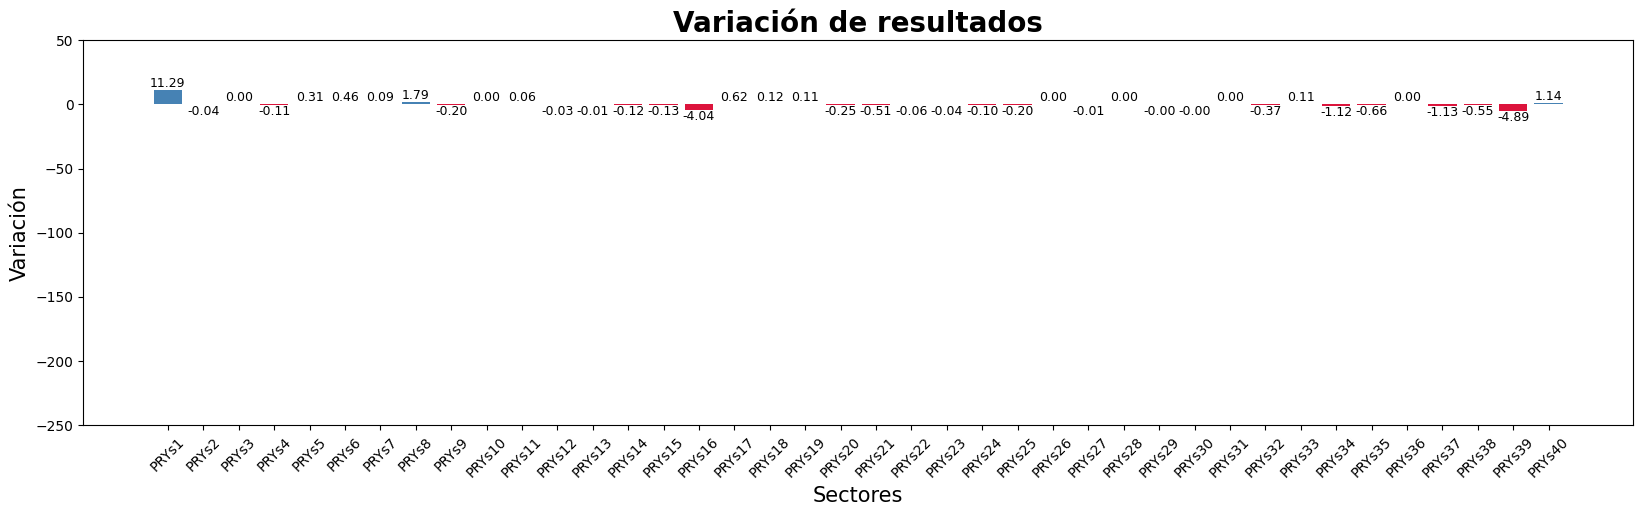

In [45]:
var_res = Delta_Prod - Delta_Prod_Simple
plt.figure(figsize=(20,5))

plt.bar(range(len(var_res)),var_res, 
color=np.where(var_res < 0, 'crimson', 'steelblue') #Color dependiendo de si es positivo o negativo
)

plt.xticks(range(len(Pry_col)),Pry_col,rotation=45)
plt.yticks([-250, -200, -150, -100, -50, 0, 50])

plt.title('Variación de resultados', fontsize=20, fontweight='bold')

# Agrego los valores encima de cada barra
for idx, value in enumerate(var_res):
    plt.text(idx, value + (0.01 if value >= 0 else -0.05), 
             f'{value:.2f}', ha='center', va='bottom' if value >= 0 else 'top', fontsize=9)

# Mejoro el estilo de los ejes
plt.xlabel('Sectores', fontsize=15)
plt.ylabel('Variación', fontsize=15)

plt.show()